In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

/tmp/ipykernel_2753163/1575835624.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


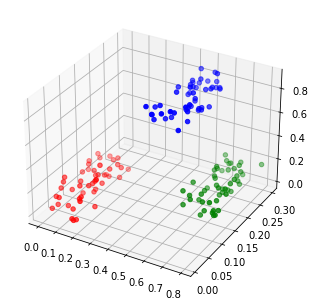

In [10]:
c1 = np.random.rand(50,3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50,3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50,3)/5
data = np.float32(np.concatenate((c1,c2,c3)))
colors=["red"]*50
colors.extend(["green"]*50)
colors.extend(["blue"]*50)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,2], c=colors)
labels=range(150)


In [13]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data)

CPU times: user 9.42 s, sys: 59.3 ms, total: 9.48 s
Wall time: 2.11 s


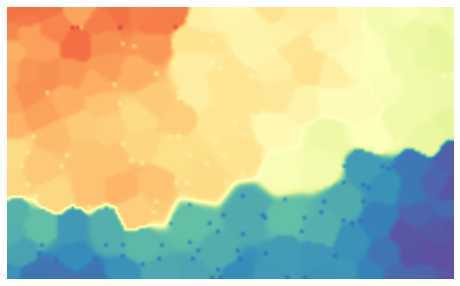

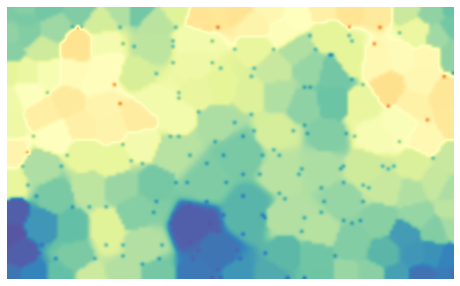

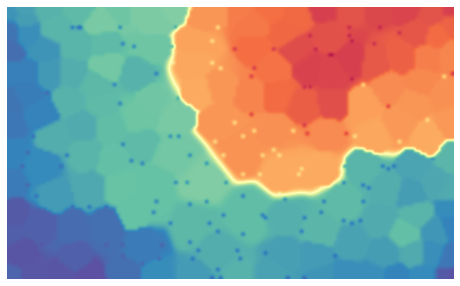

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [14]:
som.view_component_planes()

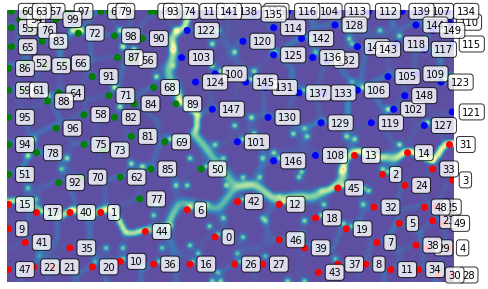

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [15]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

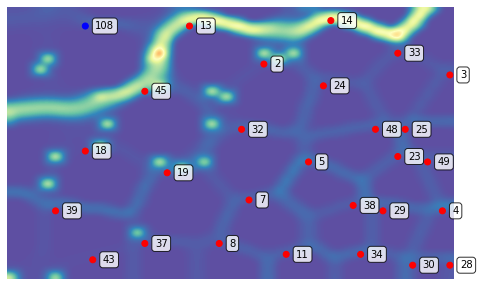

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [16]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels, 
                    zoom = ((50, n_rows), (100, n_columns)))

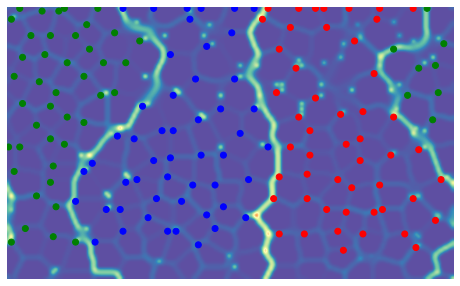

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [19]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                        compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

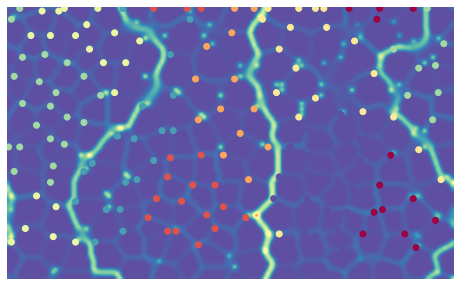

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [21]:
som.cluster()
som.view_umatrix(bestmatches=True)

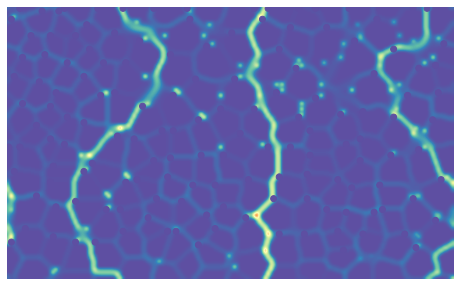

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [23]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [33]:
som = somoclu.Somoclu(n_columns, n_rows, maptype='toroid')
som.train(data)

/tmp/ipykernel_2753163/3426164168.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


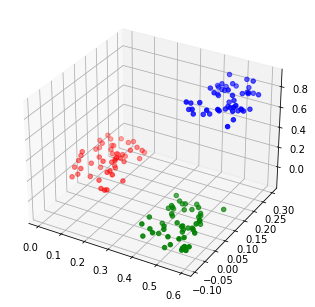

In [34]:
c2_shifted = c2 -0.2
updated_data=np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:,0], updated_data[:,1], updated_data[:, 2], c=colors)

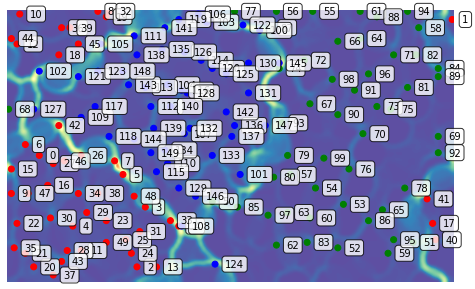

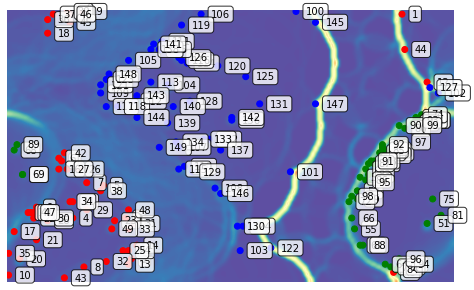

<module 'matplotlib.pyplot' from '/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [35]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors,labels=labels)
